# Exercise: 311 Requests

#### Summary

In NYC, you can call 311 with *anything* about the city - questions, complaints, etc. We'll be analyzing requests from 2015-2016 from the Department of Transportation and NYPD.

#### Data Source(s)

Filtered from full set, https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

#### Files

- `311-requests/311_Service_Requests_from_2010_to_Present.csv`, about 1.8 million rows (over 1GB of data)

#### Data dictionary

Visit [this page](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9#schema-preview) and click 'Show more' on the bottom right of the list (53 columns).

#### Skills

- Opening large files
- Time

## Opening the file

It's a big one! If your computer is slow or you only have 2GB of RAM, you might want to specify `nrows=50000` (or less). Increase the number until it takes around 20 seconds, maybe!

In [33]:
import pandas as pd

In [77]:
df = pd.read_csv('data/311_Service_Requests_from_2010_to_Present.csv')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (17,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Measuring time in Jupyter Notebooks

How long did that take? Read it in again, but this time **time how long it takes.** (and no, not with your watch - with Jupyter!)

In [78]:
%%time
df = pd.read_csv('data/311_Service_Requests_from_2010_to_Present.csv')

<string>:2: DtypeWarning: Columns (17,47) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 36.4 s, sys: 8.79 s, total: 45.2 s
Wall time: 48.1 s


### Look at the first few rows

Make sure you can see **every single column.**

In [79]:
df.shape

(1844278, 53)

In [80]:
pd.set_option('display.max_columns', 53)

In [81]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31463990,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10460.0,1110 WYATT STREET,WYATT STREET,DEVOE AVENUE,BRONX PARK AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,09/05/2015 06:55:25 AM,The Police Department responded and upon arriv...,09/05/2015 02:06:54 AM,06 BRONX,BRONX,1018201.0,245083.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.839306,-73.877301,"(40.83930620730105, -73.8773009180668)"
1,31463991,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,NaN,NaN,NaN,NaN,WEST 151 STREET,BROADWAY,INTERSECTION,NEW YORK,NaN,Precinct,Closed,09/04/2015 09:53:45 PM,The Police Department responded to the complai...,09/04/2015 06:37:24 PM,09 MANHATTAN,MANHATTAN,998728.0,241754.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.830222,-73.947684,"(40.830222460372724, -73.94768359377827)"
2,31463992,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,545 WEST 144 STREET,WEST 144 STREET,AMSTERDAM AVENUE,BROADWAY,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,09/05/2015 05:15:43 AM,The Police Department responded to the complai...,09/04/2015 10:32:02 PM,09 MANHATTAN,MANHATTAN,998263.0,239889.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.825104,-73.949368,"(40.825104318551325, -73.94936777115372)"
3,31463993,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11203.0,UTICA AVENUE,UTICA AVENUE,AVENUE D,FOSTER AVENUE,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Closed,09/05/2015 09:06:57 AM,The Police Department responded to the complai...,09/05/2015 02:26:44 AM,17 BROOKLYN,BROOKLYN,1003890.0,172805.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640965,-73.929232,"(40.64096464471428, -73.92923194083798)"
4,31463995,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,Street/Sidewalk,11210.0,GLENWOOD ROAD,GLENWOOD ROAD,BROOKLYN AVENUE,EAST 37 STREET,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Closed,09/04/2015 03:48:25 PM,The Police Department responded to the complai...,09/04/2015 05:21:19 PM,17 BROOKLYN,BROOKLYN,1000480.0,170405.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634384,-73.941525,"(40.63438406330588, -73.9415248319131)"


### Speeding things up

We're going to be looking at open and close times, agencies, and the complaints (both types and descriptor). The only kind of location-based thing we'll want is borough.

**How much faster is it if we only read in those columns?**

In [188]:
%%time
df = (pd.read_csv('data/311_Service_Requests_from_2010_to_Present.csv', 
                  usecols=['Borough', 'Agency', 'Created Date', 'Descriptor', 'Closed Date', 'Complaint Type']))

CPU times: user 14.1 s, sys: 1.58 s, total: 15.6 s
Wall time: 16.8 s


## Converting the 'Created Date' and 'Closed Date' columns to datetimes

### First, testing some things out

Let's take a look at converting **Created Date**, but **not all at once**.

1. Take 10,000 of them and try to convert them **without** a format string. Time it.
2. Take the same 10,000 and try to convert them **with** a format string. Time it.

If you tried to do all 1.8 million rows, **how long might it take with a format string vs without?**

In [85]:
%%time
pd.to_datetime(df['Created Date'][:10000]).head()

CPU times: user 3.13 s, sys: 39.1 ms, total: 3.17 s
Wall time: 3.3 s


0   2015-09-04 22:55:25
1   2015-09-04 13:53:45
2   2015-09-04 21:15:43
3   2015-09-05 01:06:57
4   2015-09-04 07:48:25
Name: Created Date, dtype: datetime64[ns]

In [86]:
%%time
pd.to_datetime(df['Created Date'][:10000], format='%m/%d/%Y %H:%M:%S %p').head()

CPU times: user 66.9 ms, sys: 1.05 ms, total: 67.9 ms
Wall time: 69.4 ms


0   2015-09-04 10:55:25
1   2015-09-04 01:53:45
2   2015-09-04 09:15:43
3   2015-09-05 01:06:57
4   2015-09-04 07:48:25
Name: Created Date, dtype: datetime64[ns]

### Creating new columns

Create new columns called `created_at` and `closed_at` from the `Created Date` and `Closed Date` columns. Do them individually, and **time them**.

In [189]:
df['created_at'] = pd.to_datetime(df['Created Date'], format='%m/%d/%Y %I:%M:%S %p')

In [190]:
df['closed_at'] = pd.to_datetime(df['Closed Date'], format='%m/%d/%Y %I:%M:%S %p')

### Confirming they look okay

Take a look at the first few rows to make sure the dates look correct, and then make sure their data type is `datetime64[ns]`.

In [191]:
df.head()

,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Borough,created_at,closed_at
0,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,BRONX,2015-09-04 22:55:25,2015-09-05 02:06:54
1,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 13:53:45,2015-09-04 18:37:24
2,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 21:15:43,2015-09-04 22:32:01
3,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,Noise - Commercial,Loud Music/Party,BROOKLYN,2015-09-05 01:06:57,2015-09-05 02:26:43
4,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,Illegal Parking,Overnight Commercial Storage,BROOKLYN,2015-09-04 07:48:25,2015-09-04 17:21:18


In [91]:
df.dtypes

Created Date              object
Closed Date               object
Agency                    object
Complaint Type            object
Descriptor                object
Borough                   object
created_at        datetime64[ns]
closed_at         datetime64[ns]
dtype: object

# Examining agencies

Who has more 311 requests, the Department of Transportation or the NYPD?

In [92]:
df['Agency'].value_counts()

NYPD    1251121
DOT      593157
Name: Agency, dtype: int64

## What's the difference between "Complaint Type" and "Descriptor" columns?

In [47]:
# Complaint type: Category
# Descriptor: More specific

## What are the most popular categories of complaints for the NYPD? For the DOT?

In [93]:
df['Complaint Type'][df['Agency'] == 'NYPD'].value_counts().head()

Noise - Residential        429932
Blocked Driveway           219927
Illegal Parking            215158
Noise - Street/Sidewalk    112890
Noise - Commercial          93115
Name: Complaint Type, dtype: int64

In [94]:
df['Complaint Type'][df['Agency'] == 'DOT'].value_counts().head()

Street Condition            215052
Street Light Condition      187228
Traffic Signal Condition     79737
Broken Muni Meter            47234
Street Sign - Damaged        12041
Name: Complaint Type, dtype: int64

In [199]:
df.groupby('Agency')['Complaint Type'].value_counts().groupby(level=0, group_keys=False).nlargest(5)

Agency  Complaint Type          
DOT     Street Condition            215052
        Street Light Condition      187228
        Traffic Signal Condition     79737
        Broken Muni Meter            47234
        Street Sign - Damaged        12041
NYPD    Noise - Residential         429932
        Blocked Driveway            219927
        Illegal Parking             215158
        Noise - Street/Sidewalk     112890
        Noise - Commercial           93115
Name: Complaint Type, dtype: int64

## When people are complaining about street conditions, what are they usually complaining about?

In [96]:
df[df['Complaint Type'] == 'Street Condition']['Descriptor'].value_counts()

Pothole                           137931
Cave-in                            22026
Rough, Pitted or Cracked Roads     12150
Defective Hardware                 11206
Failed Street Repair                9408
Blocked - Construction              7034
Line/Marking - Faded                5230
Plate Condition - Noisy             3405
Wear & Tear                         2555
Plate Condition - Shifted           2004
Plate Condition - Open               671
Line/Marking - After Repaving        513
Dumpster - Construction Waste        181
Hummock                              177
Guard Rail - Street                  145
Crash Cushion Defect                 118
Maintenance Cover                     85
Unsafe Worksite                       56
Depression Maintenance                39
Strip Paving                          34
Plate Condition - Anti-Skid           25
Dumpster - Causing Damage             17
Defacement                            15
General Bad Condition                 15
Suspected Street

## What kinds of noise are they complaining about when making residential noise complaints?

In [97]:
df[df['Complaint Type'] == 'Noise - Residential']['Descriptor'].unique()

array(['Loud Music/Party', 'Loud Talking', 'Banging/Pounding',
       'Loud Television'], dtype=object)

# Timing our complaints

How many complaints were filed each month?

- Tip: You'll probably want to `.set_index` first!

In [193]:
df.set_index('created_at', inplace=True)

In [194]:
df.resample(rule='M')['Created Date'].count()

created_at
2015-01-31    58168
2015-02-28    59895
2015-03-31    87190
2015-04-30    78002
2015-05-31    87582
2015-06-30    84486
2015-07-31    77795
2015-08-31    78793
2015-09-30    78317
2015-10-31    72201
2015-11-30    66333
2015-12-31    70215
2016-01-31    68333
2016-02-29    68408
2016-03-31    78521
2016-04-30    80137
2016-05-31    92948
2016-06-30    91815
2016-07-31    82586
2016-08-31    78215
2016-09-30    84151
2016-10-31    78274
2016-11-30    69652
2016-12-31    72261
Freq: M, Name: Created Date, dtype: int64

## Plot how many requests were filed each month

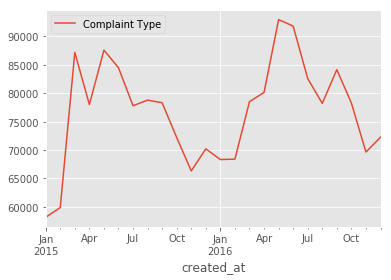

In [150]:
%matplotlib inline
df.resample(rule='M').count().plot(y='Complaint Type')

# Hmmm, it looks like a cycle

What could cause that? Try a couple comparisons to see if you can find out.

- Tip: Maybe the most popular summer complaints vs winter
- Tip: Maybe graphing the different agencies on the same graph

If you don't figure it out **that's okay!** 

In [107]:
df[df.index.month.isin([5,6,7])]['Complaint Type'].value_counts().head()

Noise - Residential       124257
Illegal Parking            57975
Street Condition           55901
Blocked Driveway           53758
Street Light Condition     47765
Name: Complaint Type, dtype: int64

In [108]:
df[df.index.month.isin([12,1,2])]['Complaint Type'].value_counts().head()

Noise - Residential       94161
Blocked Driveway          54856
Illegal Parking           46971
Street Light Condition    45431
Street Condition          44993
Name: Complaint Type, dtype: int64

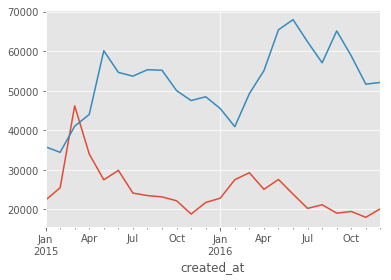

In [149]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df[df['Agency'] == 'DOT']['Complaint Type'].resample(rule='M').count().plot()
df[df['Agency'] == 'NYPD']['Complaint Type'].resample(rule='M').count().plot()

In [ ]:
# There are more noise complaints on Summer. People are outside on Summer.

## Time of day

### What time of day do people complain?

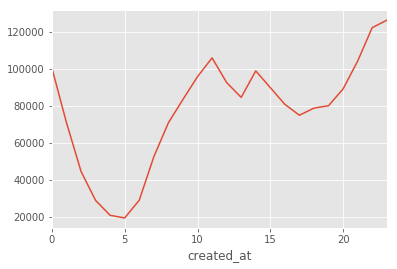

In [195]:
df.groupby(df.index.hour).apply(lambda x: len(x)).plot()

### What time of day do people complain about potholes?

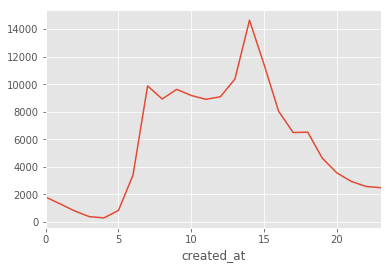

In [210]:
df_potholes = df[df['Descriptor'] == 'Pothole']
df_potholes.groupby(df_potholes.index.hour).apply(lambda x: len(x)).plot()

### What time of day do people complain about loud parties?

In [202]:
df[df['Complaint Type'] == 'Noise - Residential']['Descriptor'].unique()

array(['Loud Music/Party', 'Loud Talking', 'Banging/Pounding',
       'Loud Television'], dtype=object)

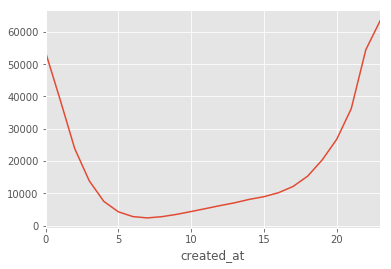

In [211]:
df_loudparties = df[df['Descriptor'] == 'Loud Music/Party']
df_loudparties.groupby(df_loudparties.index.hour).apply(lambda x: len(x)).plot()

## Days of the week

### What days of the week do people complain about potholes?

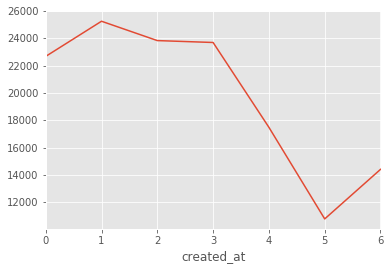

In [213]:
df_potholes = df[df['Descriptor'] == 'Pothole']
df_potholes.groupby(df_potholes.index.weekday).apply(lambda x: len(x)).plot()

### What days of the week do people complain about loud parties?

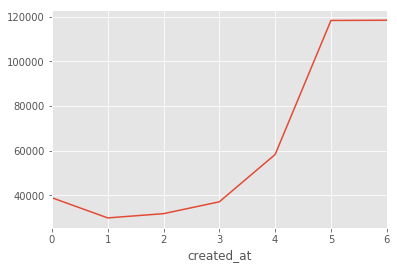

In [214]:
df_loudparties = df[df['Descriptor'] == 'Loud Music/Party']
df_loudparties.groupby(df_loudparties.index.weekday).apply(lambda x: len(x)).plot()

### What do you think is the best kind of graph for describing day of the week complaints?

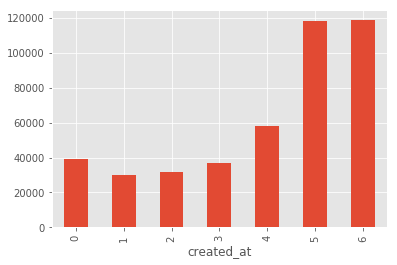

In [231]:
df_loudparties = df[df['Descriptor'] == 'Loud Music/Party']
df_loudparties.groupby(df_loudparties.index.weekday).apply(lambda x: len(x)).plot(kind='bar')

# Some more investigation

## Are there more homeless people in the city in the summer or in the winter?

In [237]:
df[df['Complaint Type'].str.contains('homeless', case=False)]['Complaint Type'].unique()

array(['Homeless Encampment'], dtype=object)

In [243]:
len(df[(df['Complaint Type'] == 'Homeless Encampment')&(df.index.month.isin([6,7,8]))])

3663

In [242]:
len(df[(df['Complaint Type'] == 'Homeless Encampment')&(df.index.month.isin([12,1,2]))])

1298

## What holiday(s) are most popular for illegal fireworks?

In [244]:
df[df['Complaint Type'].str.contains('firework', case=False)]['Complaint Type'].unique()

array(['Illegal Fireworks'], dtype=object)

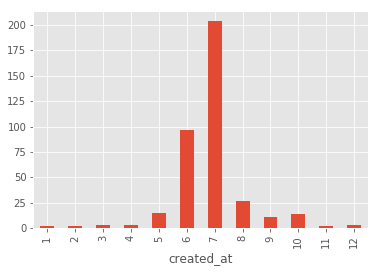

In [263]:
df_fireworks = df[(df['Complaint Type'] == 'Illegal Fireworks')]
df_fireworks.groupby(df_fireworks.index.month).apply(lambda x: len(x)).plot(kind='bar')

## Plot all kinds of noise complaints on top of each other

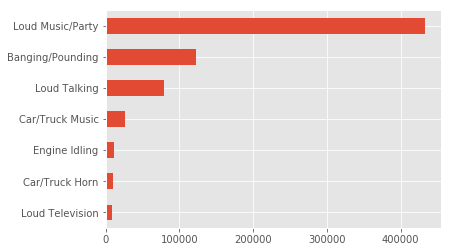

In [257]:
(df[df['Complaint Type'].str.contains('noise', case=False)]
 ['Descriptor']
 .value_counts()
 .sort_values()
 .plot(kind='barh'))